In [1]:
%load_ext autoreload
%autoreload 2

import sys
# change this to suit your path
sys.path.append('/home/guillaume/Python/kt_simul/')

In [2]:
from kt_simul.smp_spindle.smp_spindle import SympySpindle, parameters



In [3]:
parameters

{'F_k': F_k,
 'F_mz': F_mz,
 'V_k': V_k,
 'V_mz': V_mz,
 'd_0': d_0,
 'kappa_c': kappa_c,
 'kappa_k': kappa_k,
 'mu_c': mu_c,
 'mu_ch': mu_ch,
 'mu_k': mu_k,
 'mu_s': mu_s}

In [4]:
%pdb

Automatic pdb calling has been turned ON


In [5]:
spindle = SympySpindle('1D_1_1', N=3, Mk=3)

In [6]:
spindle.kanesmethod()

In [24]:
import sympy as sy

In [12]:
from sympy import Matrix

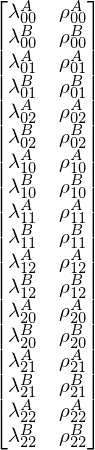

In [16]:
spindle.attach_state

In [ ]:
null_state = sy.zeros(*spindle.attach_state.shape)
amphitelic_state = null_state.copy()
## Bug??
#amphitelic_state[::2, 0] = sy.ones(spindle.N * spindle.Mk, 1)
#amphitelic_state[1::2, 1] = sy.ones(spindle.N * spindle.Mk, 1)

In [26]:
eoms = spindle.eoms.subs(subs)

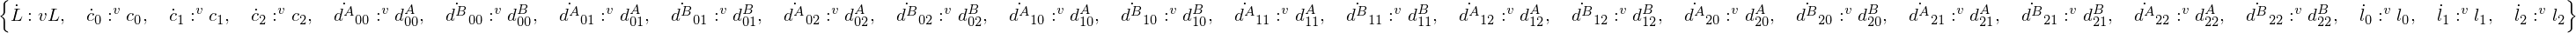

In [9]:
spindle.KM.kindiffdict()

In [15]:
parameters

{'F_k': F_k,
 'F_mz': F_mz,
 'V_k': V_k,
 'V_mz': V_mz,
 'd_0': d_0,
 'kappa_c': kappa_c,
 'kappa_k': kappa_k,
 'mu_c': mu_c,
 'mu_ch': mu_ch,
 'mu_k': mu_k,
 'mu_s': mu_s}

In [20]:
passive_params = ['mu_s', 'mu_ch', 'mu_c','mu_k',
                  'kappa_c', 'kappa_k', 'd_0']
passive_zero = {parameters[name]:0 for name in passive_params}

active_params = ['F_k', 'V_k', 'F_mz', 'V_mz']
active_zero = {parameters[name]:0 for name in active_params}

adim = {parameters['F_k']:1, parameters['V_k']:1}

In [18]:
A0 = spindle.A_uu.subs(active_zero)

In [19]:
At = spindle.A_uu.subs(passive_zero)

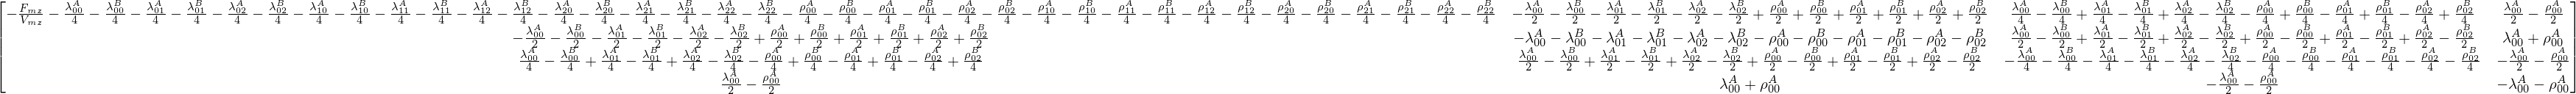

In [24]:
At.subs(adim)[:4, :4]

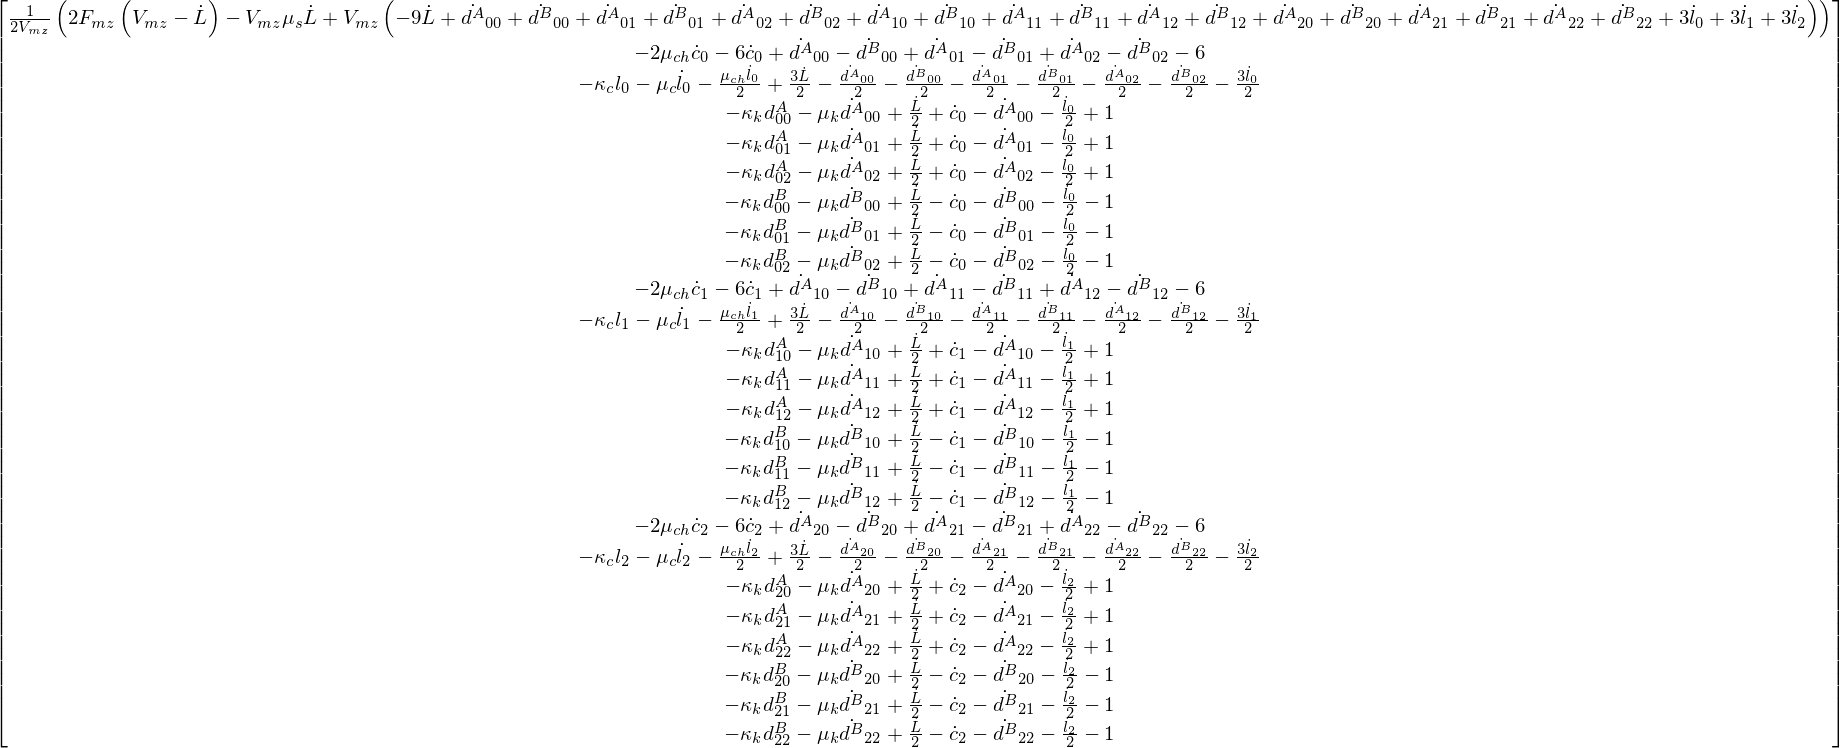

In [11]:
eoms.simplify()
rev_kddict = {v:k for k, v in spindle.KM.kindiffdict().items()}
eoms.subs(rev_kddict).subs(adim)

In [11]:
spindle.points


[spbR,
 spbL,
 ch_0,
 cen_0^A,
 as_00^A,
 as_01^A,
 as_02^A,
 cen_0^B,
 as_00^B,
 as_01^B,
 as_02^B,
 ch_1,
 cen_1^A,
 as_10^A,
 as_11^A,
 as_12^A,
 cen_1^B,
 as_10^B,
 as_11^B,
 as_12^B,
 ch_2,
 cen_2^A,
 as_20^A,
 as_21^A,
 as_22^A,
 cen_2^B,
 as_20^B,
 as_21^B,
 as_22^B]

In [12]:
spindle.q_ind

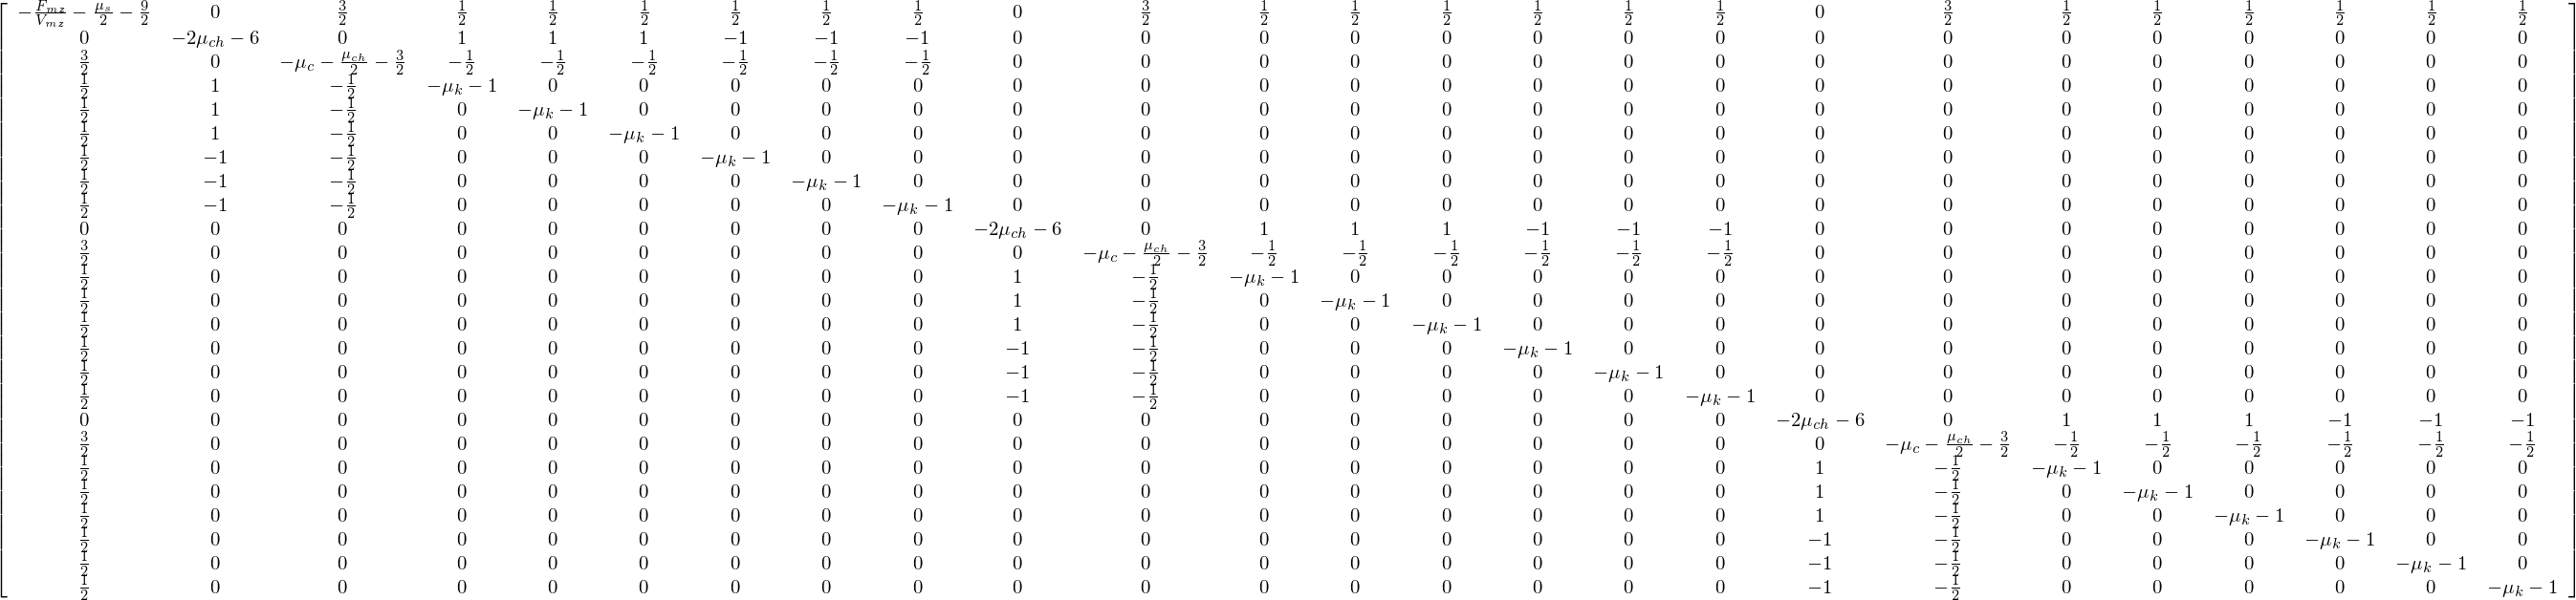

In [13]:
spindle.A_uu.subs(subs).subs({parameters['F_k']:1, parameters['V_k']:1})

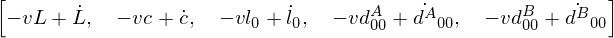

In [12]:
spindle.kd

In [10]:
spindle.u_ind


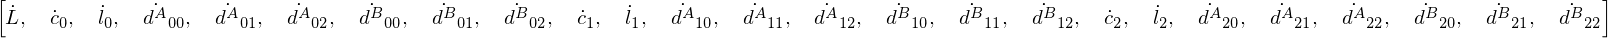

In [14]:
spindle.qd_ind

In [8]:
spindle.forces

[(spbR, - mu_s*vL/2*S.x),
 (spbL, mu_s*vL/2*S.x),
 (spbL, - F_mz*(1 - vL/V_mz)*S.x),
 (spbR, F_mz*(1 - vL/V_mz)*S.x),
 (cen_0^A, mu_ch*vl_0/2*S.x),
 (cen_0^A, - kappa_k*d_00^A*S.x),
 (as_00^A, kappa_k*d_00^A*S.x),
 (cen_0^A, - mu_k*d_00^A*S.x),
 (as_00^A, mu_k*d_00^A*S.x),
 (spbL, F_k*lambda_00^A*(1 - (d_00^A - vL/2 + vl_0/2)/V_k)*S.x),
 (as_00^A, - F_k*lambda_00^A*(1 - (d_00^A - vL/2 + vl_0/2)/V_k)*S.x),
 (as_00^A, F_k*rho_00^A*(-1 - (-d_00^A - vL/2 - vl_0/2)/V_k)*S.x),
 (spbR, - F_k*rho_00^A*(-1 - (-d_00^A - vL/2 - vl_0/2)/V_k)*S.x),
 (cen_0^B, - mu_ch*vl_0/2*S.x),
 (cen_0^B, kappa_k*d_00^B*S.x),
 (as_00^B, - kappa_k*d_00^B*S.x),
 (cen_0^B, mu_k*d_00^B*S.x),
 (as_00^B, - mu_k*d_00^B*S.x),
 (spbL, F_k*lambda_00^B*(1 - (-d_00^B - vL/2 - vl_0/2)/V_k)*S.x),
 (as_00^B, - F_k*lambda_00^B*(1 - (-d_00^B - vL/2 - vl_0/2)/V_k)*S.x),
 (as_00^B, F_k*rho_00^B*(-1 - (d_00^B - vL/2 + vl_0/2)/V_k)*S.x),
 (spbR, - F_k*rho_00^B*(-1 - (d_00^B - vL/2 + vl_0/2)/V_k)*S.x),
 (cen_0^A, kappa_c*l_0*S.x),
 (c